In [5]:
# libraries
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks read

In [6]:
# importing in data and adding column names
data <- read_csv("https://raw.githubusercontent.com/BeesKneezz/dsci_100_2023_group_7/main/data/processed.cleveland.data", col_names = FALSE)
colnames(data) <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")
data

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


In [7]:
# filtering / wrangling data
data_wrangled <- data |>
    select(age, chol, trestbps, fbs, thalach, num) |>
    filter(age > 60) |>
    mutate(num = as_factor(num))
levels(data_wrangled$num) <- c(levels(data_wrangled$num), 'Diagnosed', 'Not diagnosed')
data_wrangled$num[data_wrangled$num != '0'] <- 'Diagnosed'
data_wrangled$num[data_wrangled$num == '0'] <- 'Not diagnosed'
data_wrangled

age,chol,trestbps,fbs,thalach,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
63,233,145,1,150,Not diagnosed
67,286,160,0,108,Diagnosed
67,229,120,0,129,Diagnosed
⋮,⋮,⋮,⋮,⋮,⋮
63,187,140,0,144,Diagnosed
63,197,124,0,136,Diagnosed
68,193,144,1,141,Diagnosed


In [8]:
# splitting data sets
data_split <- initial_split(data_wrangled, prop = 0.75, strata = num)
data_train <- training(data_split)
data_test <- testing(data_split)

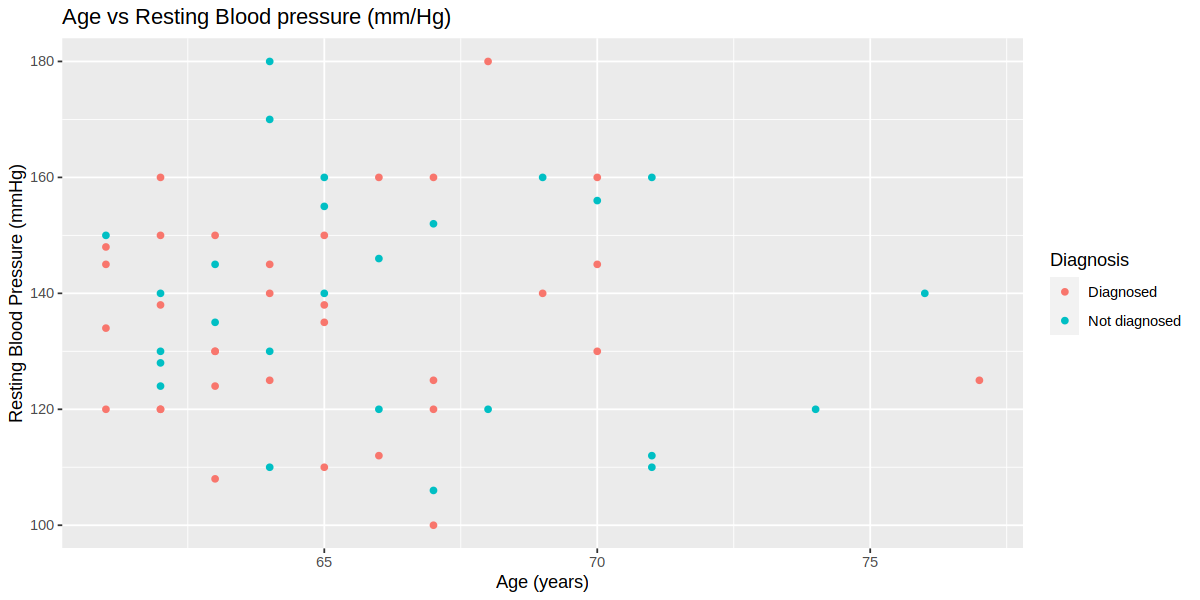

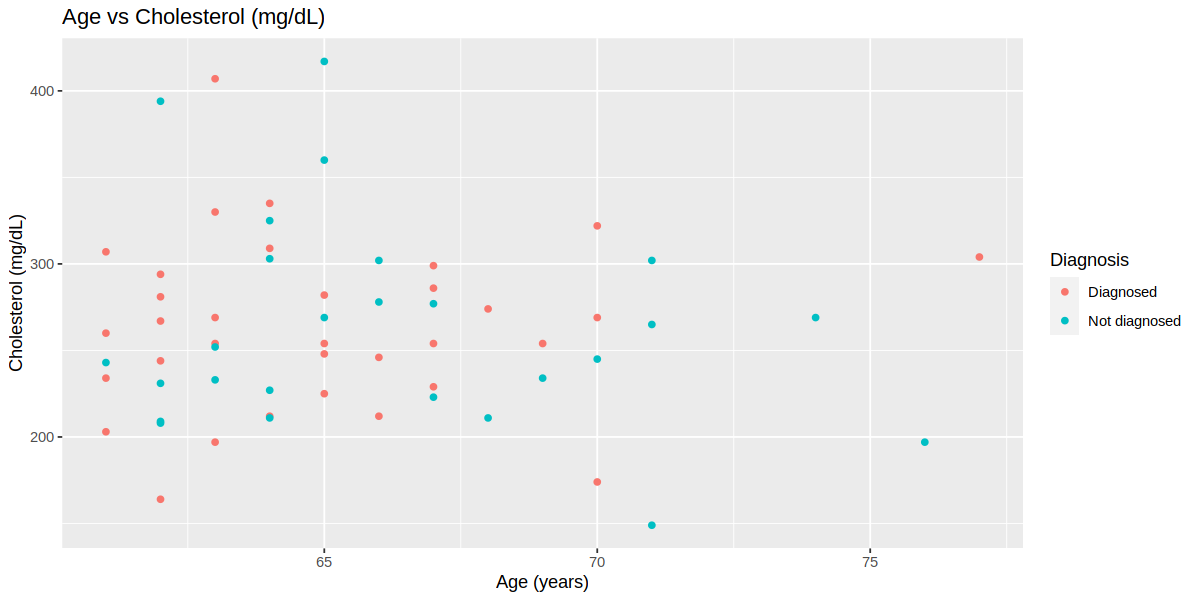

In [9]:
options(repr.plot.width = 10, repr.plot.height = 5)
#First visual
visual <- data_train %>% 
    ggplot(aes(x=age,y=trestbps, colour = num)) +
        geom_point() +
        labs(x= "Age (years)", y = "Resting Blood Pressure (mmHg)", colour = "Diagnosis") +
        ggtitle("Age vs Resting Blood pressure (mm/Hg)")
                 
#Second visual
visual_2 <- data_train |>
    ggplot(aes(x=age,y=chol, colour = num)) +
        geom_point() +
        labs(x= "Age (years)", y = "Cholesterol (mg/dL)", colour = "Diagnosis") +
        ggtitle("Age vs Cholesterol (mg/dL)")

visual
visual_2